# Cosmology: Project 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math 
import random
# File/directory handling
import os
# Data handling
import pandas as pd
pd.set_option('display.max_columns', None) # Display all of the columns of a DataFrame

## Evolution of a(t) in the Benchmark Model

In a Universe with many components, the Friedmann equation can be written in the form:

$$ \dot{a}^2 = \frac{8\pi G}{3c^2} \sum_i \varepsilon_{i,0} a^{-1-3w_i} - \frac{\kappa c^2}{R_0^2}$$

However, we'll use the Benchmark model which constrains the form of the above equation. The Benchmark model is spatially flat ($\kappa = 0$), and contains radiation, matter and cosmological constant. If the space is flat, then the last term on the right-hand side of the equation will disapear.

Moreover, the values for $w$ will be $w = 1/3$ (radiation), $w = 0$ (matter) and $w = -1$ (cosmological constant), hence:

$$ \dot{a}^2 = \frac{8\pi G}{3c^2} (\varepsilon_{r,0} + \varepsilon_{m,0} a^{-1} + \varepsilon_{\Lambda,0}a^{2}) $$

On the other hand, we know that the Friedmann equation can be written in a general form as:

$$ H(t)^2 = \frac{\dot{a}}{a} = \frac{8\pi G}{3c^2} \varepsilon (t) - \frac{\kappa c^2}{R_0^2a(t)^2} $$

We can get rid of the last term on the above equation because of the flat space.
Anyway, without further ado, the equation we have to solve is (with $ \Omega = \frac{\varepsilon (t)}{\varepsilon_{c}(t)}$, check equation 5.81 from Ryden's book, second edition):

$$\frac{H^2}{H_0^2} = \frac{\dot{a}^2}{a^2H_0^2} = \frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda,0} \Longrightarrow \dot{a}^2 = H_0^2a^2(\frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda,0})$$

$$\dot{a} = H_0 (\frac{\Omega_{r,0}}{a^2} + \frac{\Omega_{m,0}}{a} + \Omega_{\Lambda,0}a^2)^{1/2}$$

$$H(t) = H_0\sqrt{\frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda,0}}$$

In [2]:
#Important constants
G_SI = 6.67428e-11 #N*m^2/kg^2
G = 6.67428e-11 * (1/1000)**3 * (31536000e6) #N*m^2/kg^2 => m^3/kg*s^2 => km^3/kg*Myr^2
c_SI = 3e8 #m/s^2
c = 3e8 * (1/1000) * (31536000*10**6)**2 #m/s^2 => km/Myr^2

H_0SI = 67.36 / 3.086e19 #km/s*Mpc => km/s
H_0 = 67.36 *(31536000*10**6)/3.086e19 # km/s*Mpc => km/Myr
cEpsilon_SI = ((3*c_SI**2) * H_0SI**2) / (8*math.pi*G_SI) #J/m^3
cEpsilon = cEpsilon_SI * (1/(1.602e-13)) * (1000)**3 #J/m^3 => MeV/km^3
omegaR = 9.0e-5
omegaM = 0.3111
omegaL = 0.6889

In [3]:
def euler(f, t0, tn, a0, n):
    h = (tn-t0)/n #step size
    t0_l=[] #size list
    an_l=[] #solution list
    for i in range(n): 
        an = a0 + h * f(t0, a0)
        a0 = an
        t0 = (t0 + h)
        t0_l.append(t0) 
        an_l.append(a0) 
    return an_l, t0_l

In [4]:
def equation(time, a):
    a_p = H_0 * math.sqrt((omegaR/a**2) + (omegaM/a) + omegaL*a**2)
    return a_p

In [5]:
#initial condition a(t=13700 Myr) = 1
#initial condition a(t=0.05 Myr) = 2.9x10^-4
xi = 0.05
xf = 13700 #note that H_0^-1 = 14.4 Gyr
N = 1000
a, t = euler(equation, xi, xf, 2.9e-4, N)

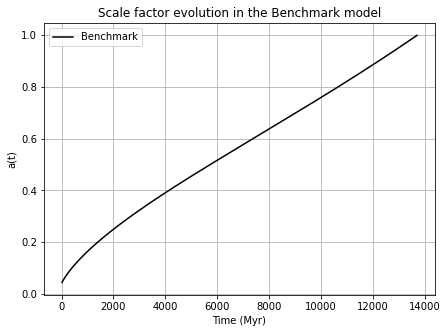

In [6]:
figure, axes = plt.subplots(1, figsize=(7,5))
#fig = plt.figure()

plt.plot(t, a, 'k')

plt.legend(["Benchmark"])
plt.title("Scale factor evolution in the Benchmark model")
plt.xlabel("Time (Myr)")
plt.ylabel("a(t)")
plt.grid()
figure.savefig('Scale_factor_evolution')
plt.show() 

Now, we know that $H = \frac{\dot{a}}{a}$, so (see the equation above):

$$H(t) = H_0\sqrt{\frac{\Omega_{r,0}}{a^4} + \frac{\Omega_{m,0}}{a^3} + \Omega_{\Lambda,0}}$$

In [7]:
H = []
for i in range(N):
  H_aux = H_0 * math.sqrt((omegaR/a[i]**4) + (omegaM/a[i]**3) + omegaL)
  H.append(H_aux)

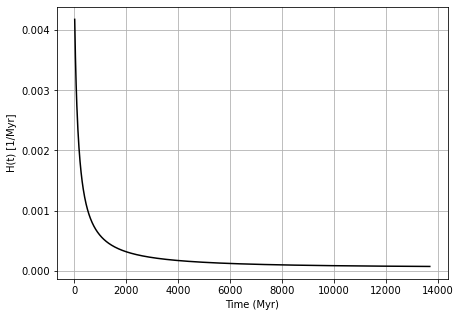

In [8]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(t, H, 'k')

#plt.legend(["Benchmark"])
#plt.title("Hubble parameter evolution in the Benchmark model")
plt.xlabel("Time (Myr)")
plt.ylabel("H(t) [1/Myr]")
plt.grid()
figure.savefig('Hubble_parameter_evolution')
plt.show() 

In [9]:
a_log, H_log = [], []
for i in range(N):
    a_log.append(math.log(a[i]))
    H_log.append(math.log(H[i]*t[i]))

In [10]:
#for i in range(N):
#    print("position: " + str(i) + ", " + str(a[i]))
#print(a.index(0.7704709447687089))

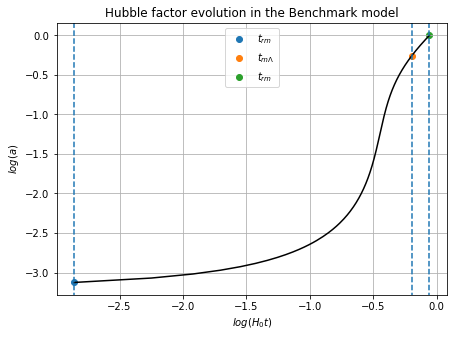

In [10]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(H_log, a_log, 'k')
plt.scatter(H_log[0], a_log[0], label = '$t_{rm}$')
plt.axvline(x=H_log[0], ymin=-4.0, ymax=1, linestyle = '--')
plt.scatter(H_log[742], a_log[742], label = '$t_{m\Lambda}$')
plt.axvline(x=H_log[742], ymin=-4.0, ymax=1, linestyle = '--')
plt.scatter(H_log[999], a_log[999], label = '$t_{rm}$')
plt.axvline(x=H_log[999], ymin=-4.0, ymax=1, linestyle = '--')

plt.legend()
plt.title("Hubble factor evolution in the Benchmark model")
plt.xlabel("$log(H_0t)$")
plt.ylabel("$log(a)$")
plt.grid()
figure.savefig('loga_vs_logHt')
plt.show() 

Here we tried to recreate the figure 5.8 from the Barbara Ryden's second edition book. However, we didn't get the linear growth expected from the time of radiation-matter equality to the matter-lambda equality.

## Evolution of energy density

Considering that the energy density is $\varepsilon_i(a) = \varepsilon_{i,0}a^{-3(1+w_i)} $, in our case:

$$\varepsilon_m(a) = \frac{\varepsilon_{m,0}}{a^3} \Longrightarrow \varepsilon_{m,0}(1+z)^3$$

$$\varepsilon_r(a) = \frac{\varepsilon_{r,0}}{a^4} \Longrightarrow \varepsilon_{r,0}(1+z)^4$$

$$\varepsilon_\Lambda(a) = \varepsilon_{\Lambda, 0}$$

Note: $a = \frac{1}{1+z}$

Moreover, the total energy density is defined as: $\varepsilon_t = \varepsilon_m + \varepsilon_r + \varepsilon_\Lambda$.

In [11]:
#Important constants
ep_m0 = cEpsilon * omegaM
ep_r0 = cEpsilon * omegaR
ep_l0 = cEpsilon * omegaL

In [12]:
# Energy density for matter with respect to a(t) (scale factor)
t = np.linspace(xi, xf, N, endpoint = True)
ep_ma, z_m, ep_mz = [], [], []
for i in range(N):
  ep_ma.append(ep_m0/a[i]**3)

# Energy density for matter with respect to z (redshift)
for i in range(N):
  z_m.append((1/a[i])-1)
  ep_mz.append(ep_m0*(1+z_m[i])**3)

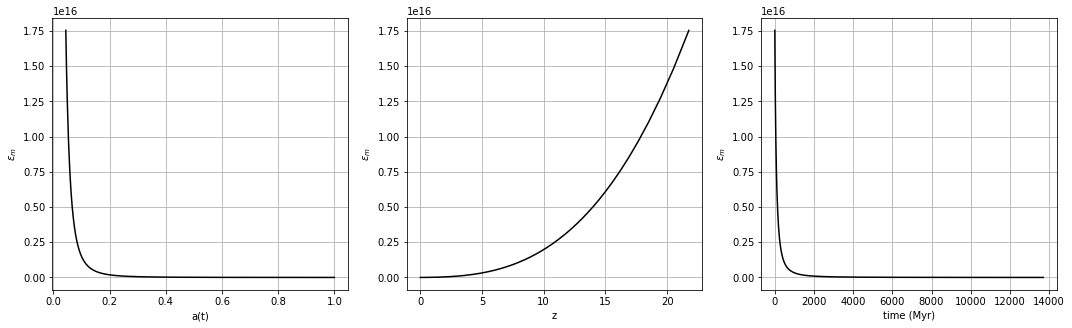

In [13]:
figure, axes = plt.subplots(1, 3)

axes[0].set_xlabel("a(t)")
axes[0].set_ylabel('$\epsilon_m$')
axes[0].plot(a, ep_ma, 'k')
axes[0].grid()
axes[1].set_xlabel("z")
axes[1].set_ylabel('$\epsilon_m$')
axes[1].plot(z_m, ep_mz, 'k')
axes[1].grid()
axes[2].set_xlabel("time (Myr)")
axes[2].set_ylabel('$\epsilon_m$')
axes[2].plot(t, ep_ma, 'k')
axes[2].grid()

figure.set_size_inches(18, 5)
figure.savefig('Mass-energy_density_evolution')

In [14]:
# Energy density for radiation with respect to a(t) (scale factor)
ep_ra, z_r, ep_rz = [], [], []
for i in range(N):
  ep_ra.append(ep_r0/a[i]**4)

# Energy density for matter with respect to z (redshift)
for i in range(N):
  z_r.append((1/a[i])-1)
  ep_rz.append(ep_r0*(1+z_r[i])**4)

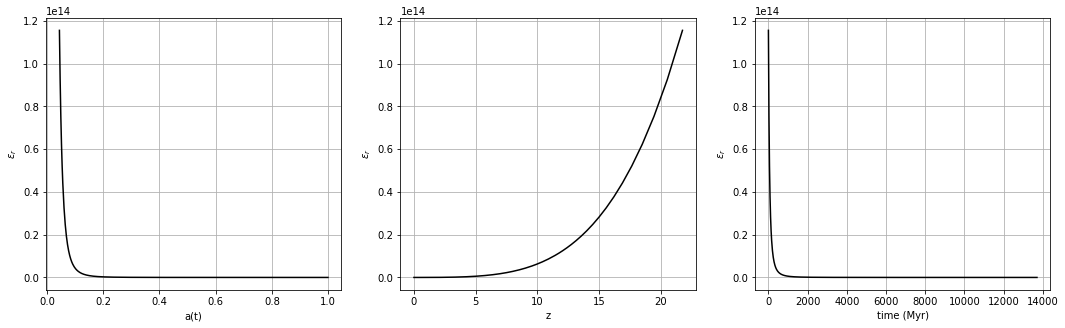

In [15]:
figure, axes = plt.subplots(1, 3)

axes[0].set_xlabel("a(t)")
axes[0].set_ylabel('$\epsilon_r$')
axes[0].plot(a, ep_ra, 'k')
axes[0].grid()
axes[1].set_xlabel("z")
axes[1].set_ylabel('$\epsilon_r$')
axes[1].plot(z_r, ep_rz, 'k')
axes[1].grid()
axes[2].set_xlabel("time (Myr)")
axes[2].set_ylabel('$\epsilon_r$')
axes[2].plot(t, ep_ra, 'k')
axes[2].grid()

figure.set_size_inches(18, 5)
figure.savefig('energy_density_radiation_evolution')

In [16]:
#Total energy density
ep_ta, ep_tz = [], []
for i in range(N): # for a(t), z and t
    ep_ta.append(ep_ma[i] + ep_ra[i] + ep_l0)
    ep_tz.append(ep_mz[i] + ep_rz[i] + ep_l0)

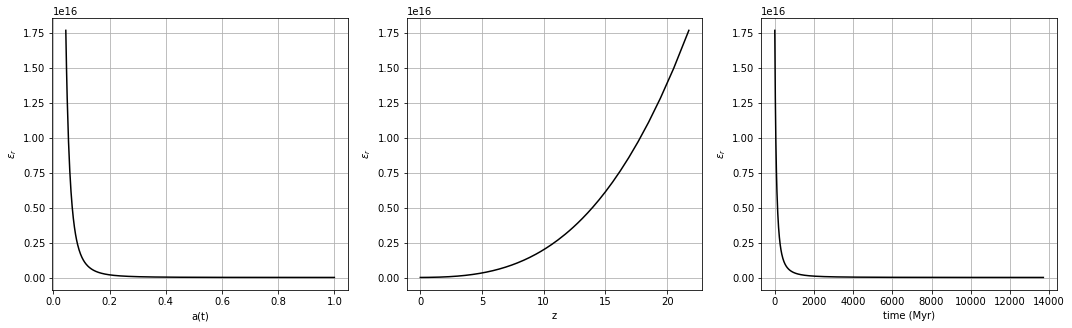

In [17]:
figure, axes = plt.subplots(1, 3)

axes[0].set_xlabel("a(t)")
axes[0].set_ylabel('$\epsilon_r$')
axes[0].plot(a, ep_ta, 'k')
axes[0].grid()
axes[1].set_xlabel("z")
axes[1].set_ylabel('$\epsilon_r$')
axes[1].plot(z_r, ep_tz, 'k')
axes[1].grid()
axes[2].set_xlabel("time (Myr)")
axes[2].set_ylabel('$\epsilon_r$')
axes[2].plot(t, ep_ta, 'k')
axes[2].grid()

figure.set_size_inches(18, 5)
figure.savefig('energy_density_radiation_evolution')

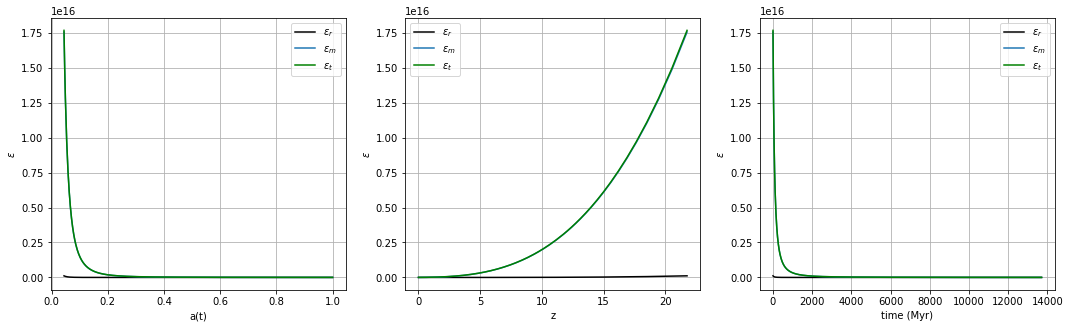

In [18]:
#Comparison
figure, axes = plt.subplots(1, 3)

axes[0].set_xlabel("a(t)")
axes[0].set_ylabel('$\epsilon$')
axes[0].plot(a, ep_ra, 'k', label = '$\epsilon_r$')
axes[0].plot(a, ep_ma, label = '$\epsilon_m$')
axes[0].plot(a, ep_ta, 'g', label = '$\epsilon_t$')
axes[0].grid()
axes[1].set_xlabel("z")
axes[1].set_ylabel('$\epsilon$')
axes[1].plot(z_r, ep_rz, 'k', label = '$\epsilon_r$')
axes[1].plot(z_m, ep_mz, label = '$\epsilon_m$')
axes[1].plot(z_m, ep_tz, 'g', label = '$\epsilon_t$')
axes[1].grid()
axes[2].set_xlabel("time (Myr)")
axes[2].set_ylabel('$\epsilon$')
axes[2].plot(t, ep_ra, 'k', label = '$\epsilon_r$')
axes[2].plot(t, ep_ma, label = '$\epsilon_m$')
axes[2].plot(t, ep_ta, 'g', label = '$\epsilon_t$')
axes[2].grid()

axes[0].legend()
axes[1].legend()
axes[2].legend()
figure.set_size_inches(18, 5)
figure.savefig('total_energy_density_evolution')

## Proper distance, luminosity distance and angular-diameter distance 

The proper distance is defined as:

$$d_p(t_0) = c\int_{t_e}^{t_o} \frac{dt}{a(t)}$$

Due to the recurrence of a(t) in the formulas, it seems convenient to try to get an approximation for this function (because I don't really know what else to do). So, using the Lagrangian interpolation:


In [20]:
## Lagrangian interpolation
def lagrange(xL,yL):
  n = len(xL)
  t = sym.Symbol('t') #symbolic variable
  poli = 0
  for i in range(n):
    numerador = 1
    denominador = 1
    for j  in range(n):
      if (j!=i):
        numerador = numerador*(t - xL[j])
        denominador = denominador*(xL[i] - xL[j])
    poli = poli + (numerador/denominador)*yL[i]
  polisimple = sym.expand(poli) #simplest expression for the polynomial
  px = sym.lambdify(t,poli)     #for numerical evaluation
  return px, polisimple

In [35]:
lista = [0, 999]
for i in range(15):
  num = random.randint(1,999)
  lista.append(num)
lista.sort()

In [36]:
a2, t2 = [], []
for i in lista: #saves the new arbitrary points of the function a
  a2.append(a[i])
  t2.append(t[i])

In [37]:
px, polinomio = lagrange(t2, a2) #here we generate the polynomial

In [38]:
print(polinomio)

-5.22062416544176e-62*t**16 + 5.67499181725644e-57*t**15 - 2.81030435342852e-52*t**14 + 8.39854350101183e-48*t**13 - 1.69162269704729e-43*t**12 + 2.42947604038435e-39*t**11 - 2.56754070755406e-35*t**10 + 2.03207203297654e-31*t**9 - 1.21456683914425e-27*t**8 + 5.49066627177175e-24*t**7 - 1.86938542398467e-20*t**6 + 4.74852696530562e-17*t**5 - 8.88308325928033e-14*t**4 + 1.21377788409948e-10*t**3 - 1.26224107649271e-7*t**2 + 0.000183158418849657*t + 0.0414501369295792


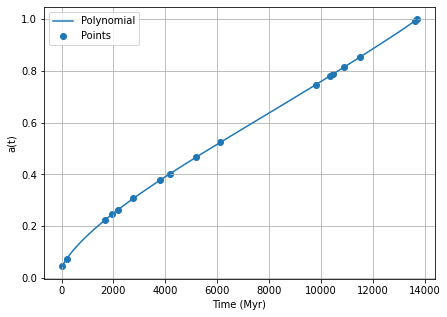

In [39]:
muestras = 101
a = np.min(t2)
b = np.max(t2)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

figure, axes = plt.subplots(1, figsize=(7,5))
plt.scatter(t2, a2, label = 'Points')
plt.plot(pxi,pfi, label = 'Polynomial')

plt.legend()
plt.xlabel("Time (Myr)")
plt.ylabel("a(t)")
plt.grid()
figure.savefig('Scale_factor_fit')
plt.show() 

In [19]:
def pdf(t): #we define the polynomial that looks like a good fit (function we'll integrate ("proper distance function"))
  pol = -5.22062416544176e-62*t**16 + 5.67499181725644e-57*t**15 - 2.81030435342852e-52*t**14 + 8.39854350101183e-48*t**13 - 1.69162269704729e-43*t**12 + 2.42947604038435e-39*t**11 - 2.56754070755406e-35*t**10 + 2.03207203297654e-31*t**9 - 1.21456683914425e-27*t**8 + 5.49066627177175e-24*t**7 - 1.86938542398467e-20*t**6 + 4.74852696530562e-17*t**5 - 8.88308325928033e-14*t**4 + 1.21377788409948e-10*t**3 - 1.26224107649271e-7*t**2 + 0.000183158418849657*t + 0.0414501369295792
  for_int = c/pol
  return for_int

In [20]:
def simpson3_8(f, a, b, n):
    h = (b - a) / n
    suma = f(a)+f(b)
    for i in range(1, n):
        k = a + i * h
        if (i % 3 == 0): 
          suma += 2* f(k) 
        else:
          suma += 3*f(k)
    area = suma * 3*(h / 8)
    return area

In [21]:
paso = np.linspace(xi, xf, N)
proper_d = [0]
for i in range(N):
  if i < 999:
    a = paso[i]
    b = paso[i+1]
    proper_d.append(simpson3_8(pdf, a, b, N))

In [22]:
print(sum(proper_d))
area = simpson3_8(pdf, xi, xf, N)
print(area)

1.0918055705045292e+37
1.0919753414368274e+37


In [23]:
proper_dMpc = []
for i in range(N):
    proper_dMpc.append(proper_d[i]*(1/(3.086e19))) #from km to Mpc

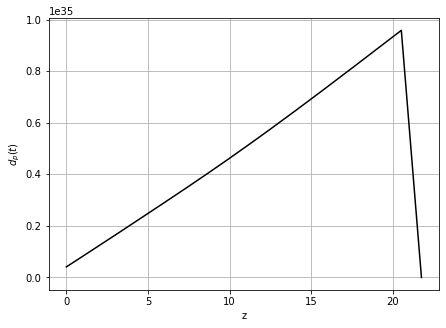

In [24]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(z_m, proper_d, 'k')


plt.xlabel("z")
plt.ylabel("$d_p (t)$")
plt.grid()
figure.savefig('proper_distance_z')
plt.show() 

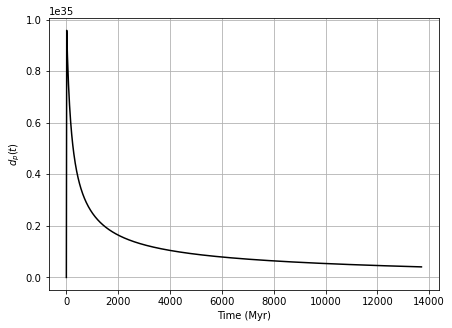

In [26]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(t, proper_d, 'k')

plt.xlabel("Time (Myr)")
plt.ylabel("$d_p (t)$")
plt.grid()
figure.savefig('proper_distance_t')
plt.show() 

By the results of the graphs above, we can be sure that something went wrong. For instance, if we look at the figure 5.9 from Ryden's book, we can't see the "growing behavior" it has at the time of the observer, but it's somehow similar at the emission time, where the proper distance has a "parabolic" behavior.\
Moreover, the proper distance should increase over time, not drop exponentially.

Using these values of the proper distance, we can compute the luminosity distance $d_L$: 

$$d_L = d_p(t_0)(1+z)$$ for k = 0.

In [27]:
d_L = []
for i in range(N):
    d_L.append(proper_d[i] * (1 + z_m[i]))

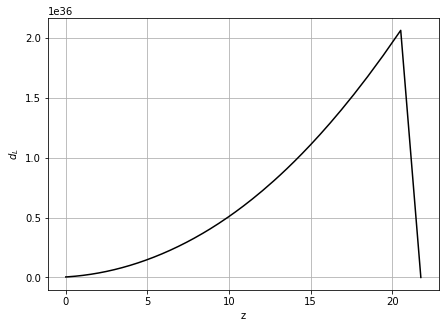

In [28]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(z_m, d_L, 'k')

plt.xlabel("z")
plt.ylabel("$d_L$")
plt.grid()
figure.savefig('luminosity_distance_z')
plt.show() 

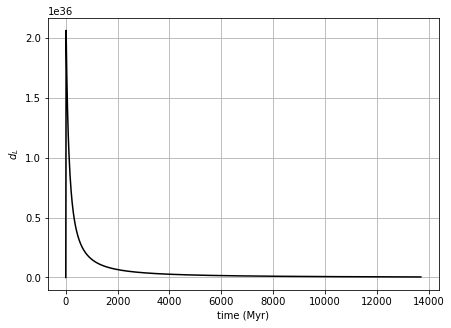

In [29]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(t, d_L, 'k')

plt.xlabel("time (Myr)")
plt.ylabel("$d_L$")
plt.grid()
figure.savefig('luminosity_distance_t')
plt.show() 

Finally, with the (wrong) luminosity distance values, we can calculate the angular-diameter distance as follows: 

$$d_A = \frac{d_L}{(1+z)^2}$$

In [30]:
d_A = []
for i in range(N):
    d_A.append(d_L[i] /(1 + z_m[i])**2)

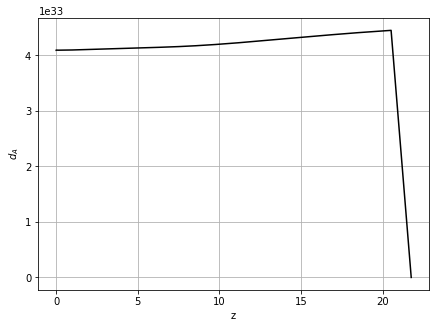

In [31]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(z_m, d_A, 'k')

plt.xlabel("z")
plt.ylabel("$d_A$")
plt.grid()
figure.savefig('angular_distance_z')
plt.show() 

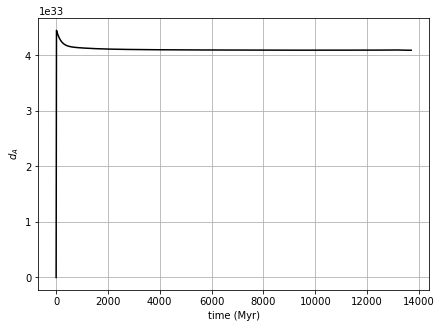

In [32]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(t, d_A, 'k')

plt.xlabel("time (Myr)")
plt.ylabel("$d_A$")
plt.grid()
figure.savefig('angular_distance_t')
plt.show()

## Distance modulus $\mu$

"The distance modulus is defined as m - M, and is related to the luminosity distance by the relation:"

$$\mu = m-M = 5log_{10}(\frac{d_L}{1 Mpc}) + 25$$

The data compared in this section was taken from: https://supernova.lbl.gov/Union/figures/SCPUnion_mu_vs_z.txt

In [53]:
##The wrong data in this document
d_mu, d_LMpc, zm_dmu = [], [], []
for i in range(N):
    d_LMpc.append(d_L[i]*(1/(3.086e19))) #since the constants used were in km, we'll change from km to Mpc
    if i > 0: #skips the first position in d_L where there's a zero
        d_mu.append(5*math.log10(d_L[i])+25)
        zm_dmu.append(z_m[i])

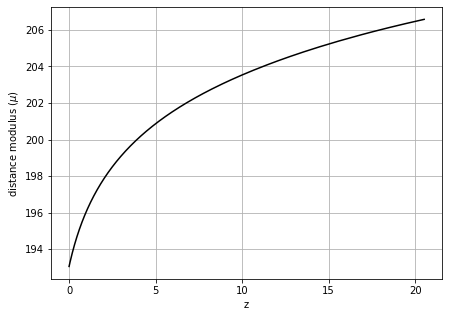

In [55]:
figure, axes = plt.subplots(1, figsize=(7,5))

plt.plot(zm_dmu, d_mu, 'k')

plt.xlabel("z")
plt.ylabel("distance modulus ($\mu$)")
plt.grid()
figure.savefig('distance_modulus')
plt.show()

In [56]:
##Experimental data
# Create a variable for the path to the file containing our example's data
data_dir = 'datos'
data_fname = 'data.csv'
data_path = os.path.join(data_dir, data_fname) # os.path.join creates a valid path out of the directory and filename
print(f'Data will be loaded from: {data_path}')

Data will be loaded from: datos\data.csv


In [57]:
# Load the data into a Pandas DataFrame object
data_1 = pd.read_csv(data_path, comment='#')
# How many rows and columns do we have this time?
print(data_1.shape) # prints (# of rows, # of columns)

(307, 4)


In [58]:
data_1.head() # What sort of data is contained in this pandas.DataFrame?

,Tag,z,μ,μ error
0,1993ag,0.050043,36.773002,0.153149
1,1993o,0.052926,36.824142,0.148454
2,1993h,0.025130,35.167818,0.165421
3,1993b,0.070086,37.567740,0.154031
4,1992bs,0.062668,37.551580,0.145317


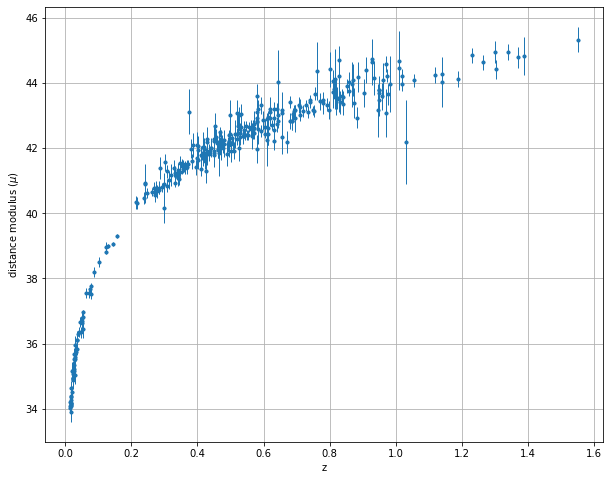

In [60]:
exp_z = data_1['z']
exp_mu = data_1['μ']
exp_muerr = data_1['μ error']

figure, axes = plt.subplots(1, figsize=(10,8))


plt.scatter(exp_z, exp_mu, 6, label = 'e')
plt.errorbar(exp_z, exp_mu, yerr = exp_muerr, fmt='.', elinewidth=1)
#plt.plot(zm_dmu, d_mu, 'k')

plt.xlabel("z")
plt.ylabel("distance modulus ($\mu$)")
plt.grid()
figure.savefig('distance_modulus_exp')
plt.show() 

We won't compare our data to the experimental data because we can crearly see they won't match. Our distance modulus increases faster and higher with respect of redshift compared to the experimental data. There must be a problem with the constants used or the methods perhaps.